In [1]:
# split target from depression dataset
import pandas as pd
import numpy as np
depression = pd.read_csv('depression dataset.csv')

target = depression['target']
depression.drop(['target', 'total_count'], axis=1, inplace=True) # drop target and total_count

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.2)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf.fit(x_train_scaled, y_train)

print('rnd_clf', rnd_clf.score(x_test_scaled, y_test))
# Predict
from sklearn.metrics import confusion_matrix 

y_pred_rnd = rnd_clf.predict(x_test_scaled)

print(confusion_matrix(y_test, y_pred_rnd))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rnd))

from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(x_train_scaled, y_train)

# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_clf, x_train_scaled, y_train, cv=5)
print(f'Mean Score SVC {np.mean(cross_score)}')


from sklearn.metrics import classification_report

y_pred_svc = svc_clf.predict(x_test_scaled)

print(classification_report(y_test, y_pred_svc))

import numpy as np
# this method used to build random values to use it for testing the model
def buildRandomValuesForPrediction():

    # get random answers for Q1A to Q42A questions
    qaAnswers = []
    for i in range(1, 43):
        qaAnswers.append(np.random.randint(1, 5)) # random from 1 to 4

    # get random answers for TIPI1 to TIPI questions
    tipiAnswers = []
    for i in range(1, 11):
        tipiAnswers.append(np.random.randint(1, 8)) # random from 1 to 7

    education = np.random.randint(1, 5) # random from 1 to 4
    urban = np.random.randint(1, 4) # random from 1 to 3
    gender = np.random.randint(1, 4) # random from 1 to 3
    religion = np.random.randint(1, 13) # random from 1 to 12
    race = np.random.randint(1, 8) # random from 1 to 7
    married = np.random.randint(1, 4) # random from 1 to 3
    familysize = np.random.randint(1, 21) # random from 1 to 20 
    age_group = np.random.randint(1, 7) # random from 1 to 6

    return np.array([*qaAnswers, *tipiAnswers, education, urban, gender, religion, race, married, familysize, age_group])


# make prediction couple of times
for i in range(1, 10):
    answers = buildRandomValuesForPrediction()
    answers_scaled = scaler.transform([answers])

    print(f'*********** Iteration {i} *************')
    print(f'Test Values: {answers}')
    print(f'Prediction ===> {svc_clf.predict(answers_scaled)}\n\n')
    

FileNotFoundError: [Errno 2] No such file or directory: 'depression dataset.csv'

In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'religion', 'race', 'married',
       'familysize', 'age_group'],
      dtype='object')

Epoch 1/20, Loss: 1.2513, Train Accuracy: 66.24%, Val Accuracy: 79.56%
Epoch 2/20, Loss: 1.1077, Train Accuracy: 80.15%, Val Accuracy: 79.40%
Epoch 3/20, Loss: 1.0983, Train Accuracy: 80.74%, Val Accuracy: 81.78%
Epoch 4/20, Loss: 1.0956, Train Accuracy: 80.77%, Val Accuracy: 82.12%
Epoch 5/20, Loss: 1.0961, Train Accuracy: 80.61%, Val Accuracy: 82.07%
Epoch 6/20, Loss: 1.0956, Train Accuracy: 80.61%, Val Accuracy: 81.41%
Epoch 7/20, Loss: 1.0921, Train Accuracy: 81.00%, Val Accuracy: 79.45%
Epoch 8/20, Loss: 1.0942, Train Accuracy: 80.71%, Val Accuracy: 81.25%
Epoch 9/20, Loss: 1.0918, Train Accuracy: 80.94%, Val Accuracy: 81.39%
Epoch 10/20, Loss: 1.0898, Train Accuracy: 81.28%, Val Accuracy: 78.37%
Epoch 11/20, Loss: 1.0885, Train Accuracy: 81.39%, Val Accuracy: 80.97%
Epoch 12/20, Loss: 1.0912, Train Accuracy: 81.15%, Val Accuracy: 73.03%
Epoch 13/20, Loss: 1.0942, Train Accuracy: 80.85%, Val Accuracy: 81.60%
Epoch 14/20, Loss: 1.0907, Train Accuracy: 81.15%, Val Accuracy: 82.13%
E

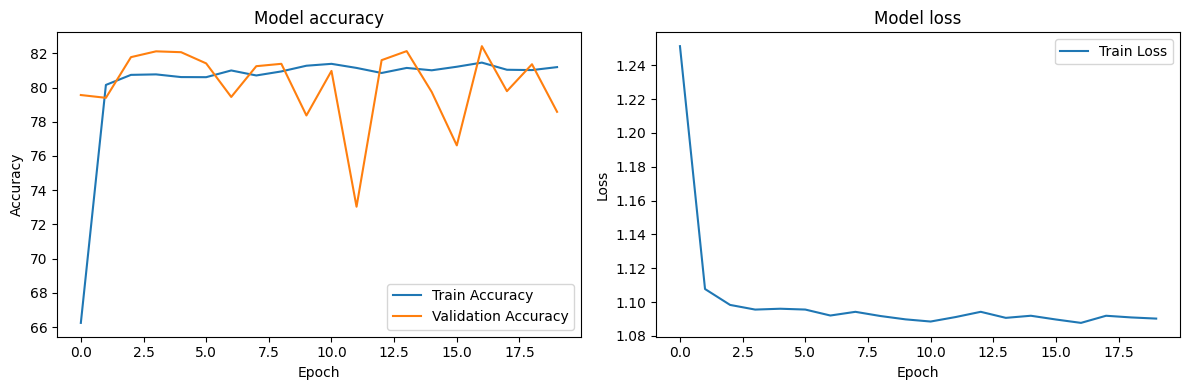

Test Accuracy: 78.58%
[[ 803    0    0    0  489]
 [   0  840  170  133    0]
 [   0  190 1734    0   80]
 [   0  203    5 1493    0]
 [  16    0  416    0 1375]]
                  precision    recall  f1-score   support

Extremely Severe       0.98      0.62      0.76      1292
            Mild       0.68      0.73      0.71      1143
        Moderate       0.75      0.87      0.80      2004
          Normal       0.92      0.88      0.90      1701
          Severe       0.71      0.76      0.73      1807

        accuracy                           0.79      7947
       macro avg       0.81      0.77      0.78      7947
    weighted avg       0.80      0.79      0.79      7947

          Predicted            Actual
0  Extremely Severe  Extremely Severe
1            Severe            Severe
2          Moderate          Moderate
3  Extremely Severe  Extremely Severe
4            Severe            Severe


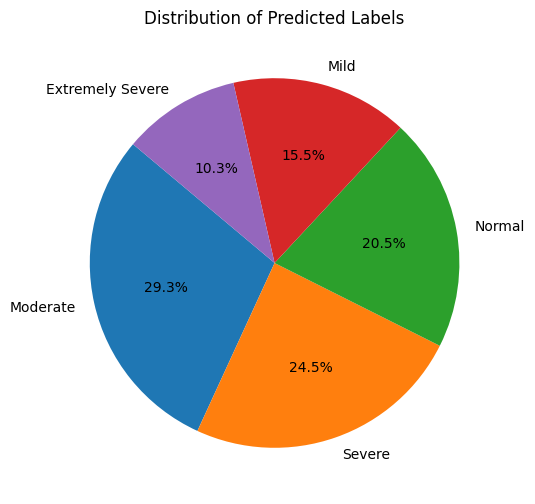

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare the data
depression = pd.read_csv('depression dataset.csv')
depression = depression[['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 
    #    'TIPI1', 'TIPI2', 'TIPI3',
    #    'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',

       'education', 'urban', 'gender', 'religion', 'race', 'married',
       'familysize', 'age_group', 'target', 'total_count']]
target = depression['target']
depression.drop(['target', 'total_count'], axis=1, inplace=True)

# Encode the string labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(depression, y_encoded, test_size=0.2, random_state=42)

# Scaling the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Initialize model, loss function, and optimizer
input_size = x_train_tensor.shape[1]
num_classes = len(label_encoder.classes_)
model = NeuralNetwork(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy for each epoch
train_losses = []
train_accuracies = []
val_accuracies = []

# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Confusion Matrix and Classification Report
print(confusion_matrix(all_labels, all_preds))
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Create a DataFrame with predictions and their original labels
predictions_df = pd.DataFrame({'Predicted': label_encoder.inverse_transform(all_preds), 'Actual': label_encoder.inverse_transform(all_labels)})
print(predictions_df.head())

# Plot a pie chart of the predicted values
predicted_counts = predictions_df['Predicted'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Labels')
plt.show()


In [4]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'education', 'urban', 'gender',
       'religion', 'race', 'married', 'familysize', 'age_group'],
      dtype='object')

In [5]:
questions_dict = {
    'Q1A': "I found myself getting upset by quite trivial things.",
    'Q2A': "I was aware of dryness of my mouth.",
    'Q3A': "I couldn't seem to experience any positive feeling at all.",
    'Q4A': "I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion).",
    'Q5A': "I just couldn't seem to get going.",
    'Q6A': "I tended to over-react to situations.",
    'Q7A': "I had a feeling of shakiness (e.g., legs going to give way).",
    'Q8A': "I found it difficult to relax.",
    'Q9A': "I found myself in situations that made me so anxious I was most relieved when they ended.",
    'Q10A': "I felt that I had nothing to look forward to.",
    'Q11A': "I found myself getting upset rather easily.",
    'Q12A': "I felt that I was using a lot of nervous energy.",
    'Q13A': "I felt sad and depressed.",
    'Q14A': "I found myself getting impatient when I was delayed in any way (e.g., elevators, traffic lights, being kept waiting).",
    'Q15A': "I had a feeling of faintness.",
    'Q16A': "I felt that I had lost interest in just about everything.",
    'Q17A': "I felt I wasn't worth much as a person.",
    'Q18A': "I felt that I was rather touchy.",
    'Q19A': "I perspired noticeably (e.g., hands sweaty) in the absence of high temperatures or physical exertion.",
    'Q20A': "I felt scared without any good reason.",
    'Q21A': "I felt that life wasn't worthwhile.",
    'Q22A': "I found it hard to wind down.",
    'Q23A': "I had difficulty in swallowing.",
    'Q24A': "I couldn't seem to get any enjoyment out of the things I did.",
    'Q25A': "I was aware of the action of my heart in the absence of physical exertion (e.g., sense of heart rate increase, heart missing a beat).",
    'Q26A': "I felt down-hearted and blue.",
    'Q27A': "I found that I was very irritable.",
    'Q28A': "I felt I was close to panic.",
    'Q29A': "I found it hard to calm down after something upset me.",
    'Q30A': "I feared that I would be 'thrown' by some trivial but unfamiliar task.",
    'Q31A': "I was unable to become enthusiastic about anything.",
    'Q32A': "I found it difficult to tolerate interruptions to what I was doing.",
    'Q33A': "I was in a state of nervous tension.",
    'Q34A': "I felt I was pretty worthless.",
    'Q35A': "I was intolerant of anything that kept me from getting on with what I was doing.",
    'Q36A': "I felt terrified.",
    'Q37A': "I could see nothing in the future to be hopeful about.",
    'Q38A': "I felt that life was meaningless.",
    'Q39A': "I found myself getting agitated.",
    'Q40A': "I was worried about situations in which I might panic and make a fool of myself.",
    'Q41A': "I experienced trembling (e.g., in the hands).",
    'Q42A': "I found it difficult to work up the initiative to do things."
}


additional_questions_dict = {
    'TIPI1': "Extraverted, enthusiastic.",
    'TIPI2': "Critical, quarrelsome.",
    'TIPI3': "Dependable, self-disciplined.",
    'TIPI4': "Anxious, easily upset.",
    'TIPI5': "Open to new experiences, complex.",
    'TIPI6': "Reserved, quiet.",
    'TIPI7': "Sympathetic, warm.",
    'TIPI8': "Disorganized, careless.",
    'TIPI9': "Calm, emotionally stable.",
    'TIPI10': "Conventional, uncreative.",
    'education': "How much education have you completed? (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree)",
    'urban': "What type of area did you live when you were a child? (1=Rural, 2=Suburban, 3=Urban)",
    'gender': "What is your gender? (1=Male, 2=Female, 3=Other)",
    'religion': "What is your religion? (1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other)",
    'race': "What is your race? (10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other)",
    'married': "What is your marital status? (1=Never married, 2=Currently married, 3=Previously married)",
    'familysize': "Including you, how many children did your mother have?",
    'age_group': "Age group of the respondent (derived from their actual age)."
}
